In [1]:
from __future__ import division
import numpy as np
import nltk
import pickle
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn import model_selection
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

In [2]:
binary=sparse.load_npz('bag_of_keys_big.npz')
freq=sparse.load_npz('bag_of_keys_freq_big.npz')

In [3]:
with open('/Users/parisa/Documents/inspires_project/inspire/keyword_occurancesBIG.pkl','rb') as f:
    mydata= np.asarray(pickle.load(f))
target=mydata[:,10]
#blank=[]
#for i in range(len(target)):
#    if target[i]=='':
#        blank.append(i)
    
X=sparse.csr_matrix.todense(binary)
#X_counts=np.delete(X,blank,axis=0)
#Y=np.delete(target,blank).astype(np.float)
#print (len(target))

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target, test_size=0.3,random_state=42,shuffle=True)

In [ ]:
#def blank(stream):
   # for i,classes in enumerate(stream):
   #     if classes=='': 
   #         yield i
            

#print (len(np.delete(X,list(blank(target)),axis=0)))

In [ ]:
clf_NB=MultinomialNB().fit(X_train,y_train)
score_NB=clf_NB.score(X_test,y_test)
#kfold = model_selection.KFold(n_splits=2, random_state=42)
#cv_results = model_selection.cross_val_score(MultinomialNB(), X_counts_train, Y_train, cv=kfold, scoring='accuracy')
print (score_NB)

In [ ]:
pred_NB=clf_NB.predict(X_test)

In [ ]:
from sklearn.linear_model import SGDClassifier

#score_SGD=clf_SGD.score(X_test,y_test,)
#print (score_SGD)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

parameters={#'loss':('hinge','log','squared_hinge'),
            #'penalty':('l2','elasticnet'),
            #'learning_rate':('')
            #'eta0':(0.0001,0.001)
}

#scores=['precision','recall']
SGD_grid=GridSearchCV(SGDClassifier(max_iter=10,class_weight='balanced'),parameters,cv=10,scoring='accuracy',n_jobs=-1)
SGD_grid.fit(X_train,y_train)
SGD_grid.fit(X_train,y_train)
print('Best score: %0.3f'% SGD_grid.best_score_)
print('Best parameters set:')
best_parameters = SGD_grid.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(param_name,best_parameters[param_name])
#for score in scores:
    #SGD_grid=GridSearchCV(SGDClassifier(loss='log',max_iter=10),parameters,cv=5,scoring='%s_macro' %score)
    #SGD_grid.fit(X_train,y_train)
    #print('Best score: %0.3f'% SGD_grid.best_score_)
    #print('Best parameters set:')
    #best_parameters = SGD_grid.best_estimator_.get_params()
    #for param_name in sorted(parameters.keys()):
          #print(param_name,best_parameters[param_name])

In [ ]:
clf_SGD=SGDClassifier(max_iter=10,class_weight='balanced',loss='log',penalty='elasticnet',alpha=0.0001)
clf_SGD.fit(X_train,y_train)
pred_SGD=clf_SGD.predict(X_test)

In [5]:
target_names=['CORE','NON-CORE', 'Rejected']
target_labels=[2,1,0]
#report= classification_report(y_test,pred_SGD,labels=target_labels,target_names=target_names)

In [ ]:
print (report)

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

def plot_validation_curve(clf,X_train,Y_train,param_name,param_range,log=True):
    #param_range=np.logspace(-6,-2,4)
    train_scores, test_scores=validation_curve(clf,X_train,Y_train,param_name=param_name,param_range=param_range,cv=5,scoring='accuracy',n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.title("Validation Curve with SGD classifier")
    plt.xlabel('alpha')
    plt.ylabel("Score")
    plt.ylim(0.3, 1.0)
    lw = 2
    
    if log == True:
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    else:
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    plt.legend(loc="best")


In [ ]:
alpha_range=np.logspace(-6,-2,4)
plt.figure()
plot_validation_curve(clf_SGD,X_train,y_train,'alpha',alpha_range,log=True)
plt.show()

In [6]:
from sklearn.svm import LinearSVC

SVC_clf = LinearSVC(C=0.175,class_weight='balanced')
SVC_clf.fit(X_train, y_train)
SVC_pred= SVC_clf.predict(X_test)
report_SVC= classification_report(y_test,SVC_pred,labels=target_labels,target_names=target_names)
print (report_SVC)

             precision    recall  f1-score   support

       CORE       0.61      0.55      0.58       813
   NON-CORE       0.29      0.21      0.24       780
   Rejected       0.91      0.94      0.93      9117

avg / total       0.84      0.86      0.85     10710



In [ ]:
C_range=np.linspace(0.2,0.5,5)
plt.figure()
plot_validation_curve(LinearSVC(),X_train,y_train,'C',C_range,log=False)
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

SVC_cm = confusion_matrix(y_test,SVC_pred,labels=[2,1,0])
#SGD_cm = confusion_matrix(y_test,pred_SGD,labels=[2,1,0])


In [8]:
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='confusion matrix',cmap=plt.cm.Purples):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print ("Normalised confusion matrix")
    else:
        print ("Confusion matrix")
    print (cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]>thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalised confusion matrix
[[0.54735547 0.0897909  0.36285363]
 [0.12051282 0.21282051 0.66666667]
 [0.02029176 0.03762202 0.94208621]]


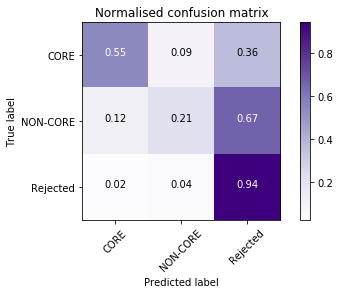

In [9]:
target_names=['CORE','NON-CORE', 'Rejected']
plt.figure()
plot_confusion_matrix(SVC_cm,classes=target_names,normalize=True,title='Normalised confusion matrix')
#plot_confusion_matrix(SVC_cm,classes=target_names,normalize=False,title='Normalised confusion matrix')
plt.show()

In [ ]:
plt.figure()
plot_confusion_matrix(SGD_cm,classes=target_names,normalize=True,title='Normalised confusion matrix')
plt.show()